# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150

In [4]:
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150

In [5]:
url = "https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/PEJ5QU/XXQCIK"
candidates = pd.read_csv(url, delimiter="\t")

## describe `candidates`

It's important to understand a few fundamentals about our data before you start work with it, including what information it contains, how large it is, and how the values are generally distributed.

In [6]:
candidates.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Sam Steiger,republican,False,total,321236,741210,False,20171011.0
1,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Wm. Mathews Feighan,independent,False,total,1565,741210,False,20171011.0
2,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Dennis DeConcini,democrat,False,total,400334,741210,False,20171011.0
3,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Allan Norwitz,libertarian,False,total,7310,741210,False,20171011.0
4,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Bob Field,independent,False,total,10765,741210,False,20171011.0


Looks like we have some rows with a few missing candidate / party fields.

In [7]:
candidates.count()

year              3421
state             3421
state_po          3421
state_fips        3421
state_cen         3421
state_ic          3421
office            3421
district          3421
stage             3421
special           3421
candidate         3011
party             2858
writein           3421
mode              3421
candidatevotes    3421
totalvotes        3421
unofficial        3421
version           3420
dtype: int64

This dataset only contains information on US Senate elections.

In [161]:
df.office.value_counts()

US Senate    3421
Name: office, dtype: int64

In [162]:
df.party.value_counts().head(10)

republican           756
democrat             748
libertarian          341
independent          256
green                 81
socialist workers     65
natural law           45
constitution          41
reform                36
none                  27
Name: party, dtype: int64

In [163]:
df.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version
count,3421.000000,3421.000000,3421.000000,3421.000000,3.421000e+03,3.421000e+03,3.420000e+03
mean,1998.862321,29.037708,52.910552,38.989769,4.052304e+05,2.179958e+06,2.017186e+07
std,12.669946,15.430661,26.035517,22.740840,7.722098e+05,2.114724e+06,3.936505e+03
min,1976.000000,1.000000,11.000000,1.000000,1.000000e+00,1.000000e+00,2.017101e+07
25%,1988.000000,17.000000,33.000000,21.000000,4.745000e+03,6.407020e+05,2.017101e+07
50%,2000.000000,29.000000,54.000000,41.000000,5.738200e+04,1.541036e+06,2.017101e+07
75%,2010.000000,41.000000,74.000000,56.000000,4.766040e+05,2.802641e+06,2.017101e+07
max,2018.000000,56.000000,95.000000,82.000000,7.864624e+06,1.257851e+07,2.019011e+07


#### Does this dataset just have the winning candidates or all?

To get this, we have to think about how to uniquely key an election.  Since we know that we only have US Senate races, we should be able to get this by grouping on year and state of a given election.  Then we can simply count the number of records to determine the number of participants we have recorded.

Below, we show that an election generally spans multiple records in this dataframe.  How can we index the winners?  Note that we will actually be indexing the winner of the popular vote in each election.

In [8]:
candidates.groupby(["year", "state"]).party.count()

year  state        
1976  Arizona          5
      California       5
      Connecticut      3
      Delaware         5
      Florida          2
                      ..
2018  Virginia         3
      Washington       2
      West Virginia    3
      Wisconsin        2
      Wyoming          3
Name: party, Length: 740, dtype: int64

### party popularity over time

/home/gvacaliuc/.virtualenvs/deep/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


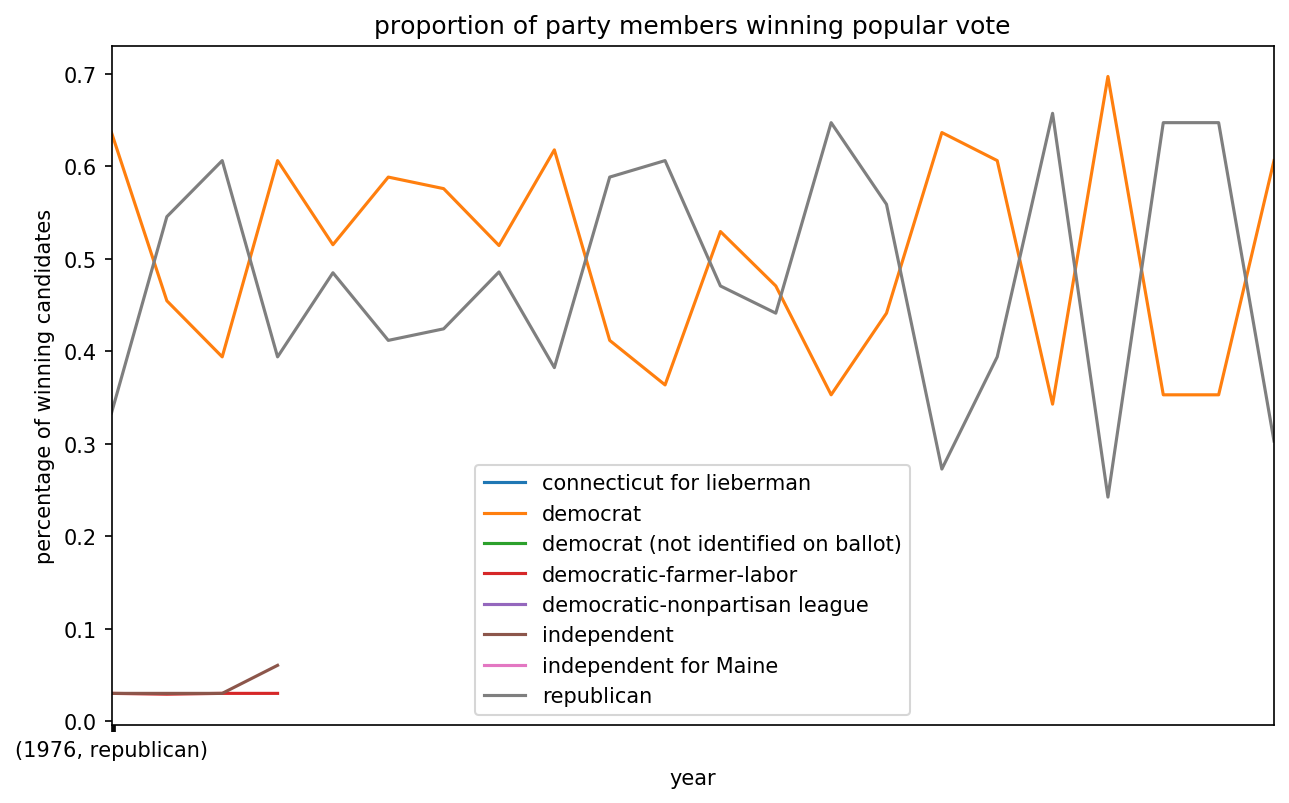

In [12]:
mostvotes = candidates.groupby(["year", "state"]).candidatevotes.idxmax()

# candidates that had the most votes in their election
# "fancy" indexing, mostvotes.values holds indices of rows we want to select
popular = candidates.iloc[mostvotes.values]

# get % of parties which had most votes per year
parties = popular.groupby("year").party.value_counts(normalize=True)

# iterate through the parties and plot a line for each
gb = parties.groupby("party")
for group in gb.groups:
    group_df = gb.get_group(group)
    group_df.plot(label=group)
    
plt.title("proportion of party members winning popular vote")
plt.xlabel("year")
plt.ylabel("percentage of winning candidates")
plt.legend()

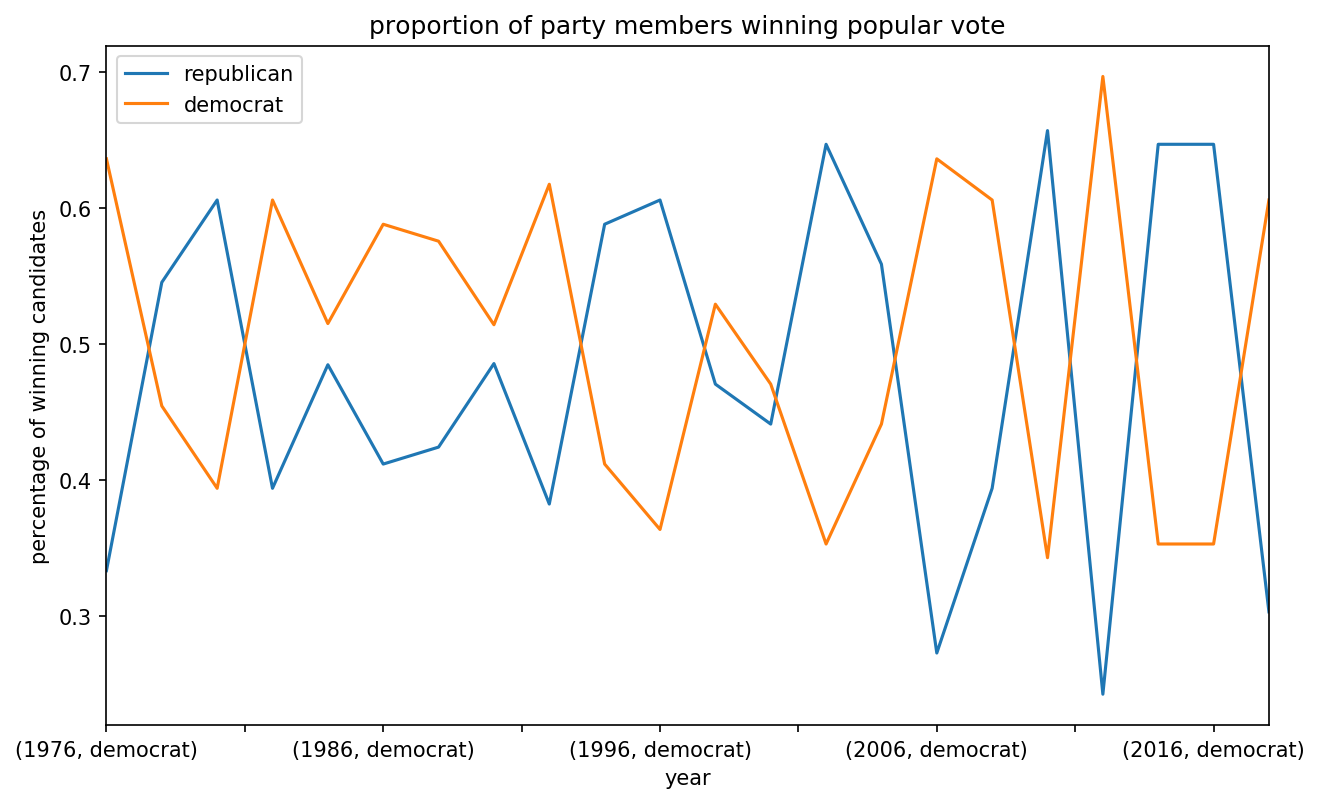

In [14]:
mostvotes = candidates.groupby(["year", "state"]).candidatevotes.idxmax()

# candidates that had the most votes in their election
# "fancy" indexing, mostvotes.values holds indices of rows we want to select
popular = candidates.iloc[mostvotes.values]

# get % of parties which had most votes per year
parties = popular.groupby("year").party.value_counts(normalize=True)

# iterate through the parties and plot a line for each
gb = parties.groupby("party")
for group in ["republican", "democrat"]:
    group_df = gb.get_group(group)
    group_df.plot(label=group)
    
plt.title("proportion of party members winning popular vote")
plt.xlabel("year")
plt.ylabel("percentage of winning candidates")
plt.legend()

In [ ]:
# how many write ins are there??

candidates.writein.value_counts().plot.bar()

In [ ]:
# how many write ins??

df.writein.value_counts(normalize=True).plot.bar()
plt.title("Proportion of Write-In Candidates")

In [ ]:
# what about through time?

writeins = df.groupby("year").writein \
                .value_counts(normalize=True) \
                .reset_index("writein", name="ratio")
writeins.head()

In [ ]:
writeins[writeins["writein"] == True].ratio.plot.line()
plt.title("Proportion of US Senate Write-Ins")